In [1]:
%%capture state
from __future__ import division
from __future__ import print_function

import sys, os
sys.path.append('../')

import tensorflow as tf
import numpy as np

from models.neural_network import NeuralNetwork
from models.cnn import CNN
#from models.util import avg_l2_dist, visualize, normalize

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#Seed used for all calculations of training and test point indices 
SEED = 14

In [2]:
## Visualization of samples
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(image):
    plt.figure(figsize=(1, 1))
    if image.shape[-1] == 1:
        # image is in black and white
        image = image[:, :, 0]
        plt.imshow(image, cmap='Greys')
    else:
        # image is in color
        plt.imshow(image)
    plt.axis('off')
    plt.show()

#Normalize rows of a given matrix
def normalize(matrix):
    matrix_nm = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        matrix_nm[i] = matrix[i]/np.linalg.norm(matrix[i]) 
    return matrix_nm

In [ ]:
#Load model from disk
model_name = 'SVHN'
model_save_path = '../trained_models/' + model_name + '-model.json'
weights_save_path = '../trained_models/' + model_name + 'weights'
model = CNN(model_name=model_name, dataset='svhn')
print (model.num_params)
epochs = 200
model.train(epochs=epochs)
model.save_model(model_save_path, weights_save_path)  
#model.load_model(model_save_path, weights_save_path) 

22247242
Train on 604388 samples, validate on 13016 samples
Epoch 1/200
604388/604388 [==============================] - 180s 298us/step - loss: 0.8540 - acc: 0.8480 - val_loss: 0.7491 - val_acc: 0.8638
Epoch 2/200
604388/604388 [==============================] - 180s 298us/step - loss: 0.5641 - acc: 0.9097 - val_loss: 0.6356 - val_acc: 0.8848
Epoch 3/200
604388/604388 [==============================] - 180s 298us/step - loss: 0.5155 - acc: 0.9192 - val_loss: 0.5934 - val_acc: 0.8973
Epoch 4/200
604388/604388 [==============================] - 180s 298us/step - loss: 0.4850 - acc: 0.9250 - val_loss: 0.5619 - val_acc: 0.9033
Epoch 5/200
604388/604388 [==============================] - 180s 297us/step - loss: 0.4547 - acc: 0.9291 - val_loss: 0.5317 - val_acc: 0.9072
Epoch 6/200
604388/604388 [==============================] - 180s 297us/step - loss: 0.4307 - acc: 0.9325 - val_loss: 0.5062 - val_acc: 0.9100
Epoch 7/200
604388/604388 [==============================] - 180s 297us/step - los

604388/604388 [==============================] - 179s 297us/step - loss: 0.3312 - acc: 0.9502 - val_loss: 0.4141 - val_acc: 0.9282
Epoch 58/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3309 - acc: 0.9503 - val_loss: 0.4160 - val_acc: 0.9301
Epoch 59/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3307 - acc: 0.9504 - val_loss: 0.4101 - val_acc: 0.9267
Epoch 60/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3305 - acc: 0.9504 - val_loss: 0.4163 - val_acc: 0.9269
Epoch 61/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3294 - acc: 0.9504 - val_loss: 0.4229 - val_acc: 0.9230
Epoch 62/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3289 - acc: 0.9507 - val_loss: 0.4347 - val_acc: 0.9202
Epoch 63/200
604388/604388 [==============================] - 179s 297us/step - loss: 0.3289 - acc: 0.9508 - val_loss: 0.4021 - val_acc: 0.9312
Epoch

Epoch 114/200
604388/604388 [==============================] - 178s 295us/step - loss: 0.3140 - acc: 0.9527 - val_loss: 0.4140 - val_acc: 0.9259
Epoch 115/200
604388/604388 [==============================] - 178s 294us/step - loss: 0.3140 - acc: 0.9527 - val_loss: 0.3921 - val_acc: 0.9329
Epoch 116/200
604388/604388 [==============================] - 178s 294us/step - loss: 0.3142 - acc: 0.9525 - val_loss: 0.3945 - val_acc: 0.9303
Epoch 117/200
604388/604388 [==============================] - 179s 296us/step - loss: 0.3136 - acc: 0.9527 - val_loss: 0.3962 - val_acc: 0.9315
Epoch 118/200
597376/604388 [============================>.] - ETA: 2s - loss: 0.3125 - acc: 0.9532

In [4]:
#Get training samples
num_train_samples = 1000
data_indices = model.gen_rand_indices(low=0, high=model.train_data.shape[0], seed=SEED, num_samples=num_train_samples)
train_data = model.train_data[data_indices]
train_data_labels = model.train_labels[data_indices]
train_data_labels_int = np.argmax(train_data_labels, axis=1)

In [5]:
num_test_samples_per_class = 10
num_test_samples = 10*num_test_samples_per_class

#Generate test points
test_indices = model.gen_rand_indices_all_classes(y=model.test_labels, seed=SEED, num_samples=num_test_samples_per_class)

#Get Regular, Noisy, FGSM, BIM, and CW test points
reg_data = model.test_data[test_indices]
noisy_data = model.generate_perturbed_data(model.test_data[test_indices], model.test_labels[test_indices],seed=SEED, perturbation='Noisy', eps=0.1)
fgsm_data = model.generate_perturbed_data(model.test_data[test_indices], model.test_labels[test_indices],seed=SEED, perturbation='FGSM', eps=0.1)
bim_data = model.generate_perturbed_data(model.test_data[test_indices], model.test_labels[test_indices], seed=SEED, perturbation='BIM', iterations=10, eps=0.1)
cw_data = model.generate_perturbed_data(model.test_data[test_indices], model.test_labels[test_indices],seed=SEED, perturbation='CW', targeted=False, eps=0.1)

/root/notebook/cleverhans/cleverhans/src/cleverhans/cleverhans/utils_keras.py:144: UserWarning: Please update your version to keras >= 2.1.3; support for earlier keras versions will be dropped on 2018-07-22
  "Please update your version to keras >= 2.1.3; "


In [6]:
#Whitebox CW Attack
#First get guide images
guide_indices = list()
np.random.seed(SEED)
#Generate guide images for modified CW attacks
for idx in test_indices:
    label = np.argmax(model.test_labels[idx])
    #Add 1 to the label mod 10 to get a target label
    mod_label = (label + 1) % 10
    #Get a test point with the target label
    guide_imgs_indices = np.where(model.train_labels[:,mod_label] == 1)[0]
    #Choose a guide image
    guide_img_idx = np.random.choice(guide_imgs_indices, 1)[0]
    guide_indices.append(guide_img_idx)


#1 Phase Attack
p1_cw_data = model.generate_perturbed_data(model.test_data[test_indices], model.train_labels[guide_indices],seed=SEED, perturbation='CW', targeted=True, x_tar = model.train_data[guide_indices], use_cos_norm_reg=True, eps=0.1)

#2 Phase Attack
#Phase 1: Generate targeted adversarial images
tar_cw_data = model.generate_perturbed_data(model.test_data[test_indices], model.train_labels[guide_indices],seed=SEED, perturbation='CW', targeted=True, use_cos_norm_reg=False, eps=0.1)
#Phase 2: Optimize for higher cosine sim and smaller norm
p2_cw_data = model.generate_perturbed_data(tar_cw_data, model.train_labels[guide_indices],seed=SEED, perturbation='CW', targeted=True, x_tar = model.train_data[guide_indices], use_cos_norm_reg=True, eps=0.1)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
#Reset tf.graph() as Cleverhans modifies the graph
tf.reset_default_graph()

#Reload the model and weights
model = CNN(model_name=model_name, dataset='svhn')
model.load_model(model_save_path, weights_save_path)    

Loaded model from disk


In [36]:
model.model.evaluate(model.test_data, model.test_labels)

15816/15816 [==============================] - 5s 290us/step


[0.69354552166234018, 0.88359888720283253]

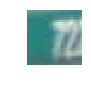

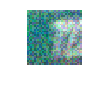

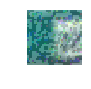

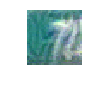

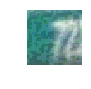

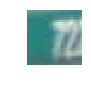

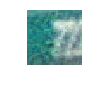

In [8]:
#Lets visualize one sample from each dataset
x_vis = np.random.choice(range(0,num_test_samples), 1)
visualize(reg_data[x_vis].reshape(32,32,3))
visualize(noisy_data[x_vis].reshape(32,32,3))
visualize(fgsm_data[x_vis].reshape(32,32,3))
visualize(bim_data[x_vis].reshape(32,32,3))
visualize(cw_data[x_vis].reshape(32,32,3))
visualize(p1_cw_data[x_vis].reshape(32,32,3))
visualize(p2_cw_data[x_vis].reshape(32,32,3))

In [10]:
#Get predictions
reg_preds = model.model.predict(reg_data.reshape(-1,32,32,3))
noisy_preds = model.model.predict(noisy_data.reshape(-1,32,32,3))
fgsm_preds = model.model.predict(fgsm_data.reshape(-1,32,32,3))
bim_preds = model.model.predict(bim_data.reshape(-1,32,32,3))
cw_preds = model.model.predict(cw_data.reshape(-1,32,32,3))
p1_cw_preds = model.model.predict(p1_cw_data.reshape(-1,32,32,3))
p2_cw_preds = model.model.predict(p2_cw_data.reshape(-1,32,32,3))

In [11]:
#Convert preds to labels
reg_labels = np.zeros(reg_preds.shape)
reg_labels[np.arange(num_test_samples),np.argmax(reg_preds, axis=1)] = 1

noisy_labels = np.zeros(noisy_preds.shape)
noisy_labels[np.arange(num_test_samples),np.argmax(noisy_preds, axis=1)] = 1

fgsm_labels = np.zeros(fgsm_preds.shape)
fgsm_labels[np.arange(num_test_samples),np.argmax(fgsm_preds, axis=1)] = 1

bim_labels = np.zeros(bim_preds.shape)
bim_labels[np.arange(num_test_samples),np.argmax(bim_preds, axis=1)] = 1

cw_labels = np.zeros(cw_preds.shape)
cw_labels[np.arange(num_test_samples),np.argmax(cw_preds, axis=1)] = 1

p1_cw_labels = np.zeros(p1_cw_preds.shape)
p1_cw_labels[np.arange(num_test_samples),np.argmax(p1_cw_preds, axis=1)] = 1

p2_cw_labels = np.zeros(p2_cw_preds.shape)
p2_cw_labels[np.arange(num_test_samples),np.argmax(p2_cw_preds, axis=1)] = 1

In [13]:
#Check preds to ensure adversarial samples were generated correctly
print (np.argmax(reg_preds, axis=1))
print (np.argmax(noisy_preds, axis=1))
print (np.argmax(fgsm_preds, axis=1))
print (np.argmax(bim_preds, axis=1))
print (np.argmax(cw_preds, axis=1))
print (np.argmax(p1_cw_preds, axis=1))
print (np.argmax(p2_cw_preds, axis=1))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 6 5 5 5 5 5 5 5 6 6 6 6 6 6 6 1 6 6 1 1 1 7
 7 7 7 7 7 7 6 8 8 1 6 8 8 9 8 8 9 9 9 6 9 9 9 9 9 9]
[0 9 1 6 1 1 3 0 9 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 5
 3 1 3 4 4 4 1 4 4 2 1 4 4 5 5 6 5 5 5 5 1 5 5 6 5 6 5 2 6 6 1 6 6 1 1 1 1
 1 2 1 2 7 2 6 1 3 1 6 8 8 2 8 8 2 9 9 2 9 9 9 3 2 9]
[5 5 5 5 5 4 5 1 5 2 1 2 2 2 2 5 3 6 2 1 5 2 4 5 3 1 2 2 2 5 2 2 1 1 9 2 5
 2 4 5 6 5 1 1 1 5 9 5 1 2 6 3 6 5 1 5 6 1 1 1 1 2 2 3 5 0 5 1 5 6 1 4 1 1
 3 1 2 1 2 2 6 5 3 1 1 1 2 2 5 6 1 2 3 5 1 9 5 2 3 5]
[5 8 5 5 8 5 5 4 5 3 3 5 6 0 3 2 0 0 4 0 5 5 5 3 6 6 3 0 0 6 7 9 2 0 9 2 6
 2 1 5 0 3 3 1 1 0 2 6 6 3 6 3 3 6 3 0 6 6 1 7 7 3 2 3 2 0 3 0 3 3 3 4 7 0
 9 2 9 9 2 2 2 1 3 9 2 2 9 2 5 6 6 2 3 9 2 2 3 0 6 5]
[8 9 9 5 6 9 8 6 9 2 3 2 3 0 3 2 8 0 4 0 5 3 9 3 3 0 7 3 0 7 7 8 8 1 8 2 5
 8 1 5 6 3 1 1 1 1 2 5 6 3 6 3 5 6 3 8 6 6 3 3 8 5 8 5 8 0 5 0 3 0 2 4 7 1
 0 2 2 3 2 2 8 6 3 0 8 6 9 2 3 6 8

In [14]:
#Get gradients for all test points
grads_reg = model.get_gradients_wrt_params(reg_data, reg_labels)
grads_noisy = model.get_gradients_wrt_params(noisy_data, noisy_labels)
grads_fgsm = model.get_gradients_wrt_params(fgsm_data, fgsm_labels)
grads_bim = model.get_gradients_wrt_params(bim_data, bim_labels)
grads_cw = model.get_gradients_wrt_params(cw_data, cw_labels)
grads_p1_cw = model.get_gradients_wrt_params(p1_cw_data, p1_cw_labels)
grads_p2_cw = model.get_gradients_wrt_params(p2_cw_data, p2_cw_labels)

#Get gradients for training points 
grads_train = model.get_gradients_wrt_params(train_data, train_data_labels)

In [15]:
grads_reg_nm = normalize(grads_reg)
grads_noisy_nm = normalize(grads_noisy)
grads_fgsm_nm = normalize(grads_fgsm)
grads_bim_nm = normalize(grads_bim)
grads_cw_nm = normalize(grads_cw)
grads_p1_cw_nm = normalize(grads_p1_cw)
grads_p2_cw_nm = normalize(grads_p2_cw)
grads_train_nm = normalize(grads_train)

In [16]:
#Get norms 
grads_reg_norms = np.sqrt(np.dot(grads_reg, grads_reg.T)).diagonal()
grads_noisy_norms = np.sqrt(np.dot(grads_noisy, grads_noisy.T)).diagonal()
grads_bim_norms = np.sqrt(np.dot(grads_bim, grads_bim.T)).diagonal()
grads_fgsm_norms = np.sqrt(np.dot(grads_fgsm, grads_fgsm.T)).diagonal()
grads_cw_norms = np.sqrt(np.dot(grads_cw, grads_cw.T)).diagonal()
grads_p1_cw_norms = np.sqrt(np.dot(grads_p1_cw, grads_p1_cw.T)).diagonal()
grads_p2_cw_norms = np.sqrt(np.dot(grads_p2_cw, grads_p2_cw.T)).diagonal()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


In [17]:
#Get cosine similarity matrix
cos_sim_reg = np.dot(grads_reg_nm, grads_train_nm.T)
cos_sim_noisy = np.dot(grads_noisy_nm, grads_train_nm.T)
cos_sim_fgsm = np.dot(grads_fgsm_nm, grads_train_nm.T)
cos_sim_bim = np.dot(grads_bim_nm, grads_train_nm.T)
cos_sim_cw = np.dot(grads_cw_nm, grads_train_nm.T)
cos_sim_p1_cw = np.dot(grads_p1_cw_nm, grads_train_nm.T)
cos_sim_p2_cw = np.dot(grads_p2_cw_nm, grads_train_nm.T)

In [24]:
#Separate Using Cos Sim

eta = 0.45

count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_reg[i]) > eta:
        count+=1.0
        
print ('Regular: %.4f' % ( count/num_test_samples))

count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_noisy[i]) > eta:
        count+=1.0
    
print ('Noisy:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_fgsm[i]) > eta:
        count+=1.0
        
print ('FGSM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_bim[i]) > eta:
        count+=1.0
        
print ('BIM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_cw[i]) > eta:
        count+=1.0
    
print ('CW: %.4f' % ( count/num_test_samples))


count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_p1_cw[i]) > eta:
        count+=1.0
        
print ('1 Phase CW:  %.4f' % ( count/num_test_samples))

count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_p2_cw[i]) > eta:
        count+=1.0
        
print ('2 Phase CW:  %.4f' % ( count/num_test_samples))

Regular: 0.8700
Noisy:  0.6300
FGSM:  0.1700
BIM:  0.7200
CW: 0.5200
1 Phase CW:  0.5100
2 Phase CW:  0.5200


In [32]:
#Separate using just norm
gamma = 55.45

count = 0.0
for i in range(num_test_samples):
    if grads_reg_norms[i] < gamma:
        count+=1.0
        
print ('Regular: %.4f' % ( count/num_test_samples))

count = 0.0
for i in range(num_test_samples):
    if grads_noisy_norms[i] < gamma:
        count+=1.0
    
print ('Noisy:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if grads_fgsm_norms[i] < gamma:
        count+=1.0
        
print ('FGSM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if grads_bim_norms[i] < gamma:
        count+=1.0
        
print ('BIM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if grads_cw_norms[i] < gamma:
        count+=1.0
    
print ('CW: %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if grads_p1_cw_norms[i] < gamma:
        count+=1.0
    
print ('1 Phase CW: %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if grads_p2_cw_norms[i] < gamma:
        count+=1.0
    
print ('2 Phase CW: %.4f' % ( count/num_test_samples))



Regular: 0.8700
Noisy:  0.5900
FGSM:  0.4300
BIM:  0.9700
CW: 0.5400
1 Phase CW: 0.7300
2 Phase CW: 0.5100


In [33]:
#Use both cos and norm

count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_reg[i]) > eta and grads_reg_norms[i] < gamma:
        count+=1.0
        
print ('Regular: %.4f' % ( count/num_test_samples))

count = 0.0
for i in range(num_test_samples):
    if np.max(cos_sim_noisy[i]) > eta and grads_noisy_norms[i] < gamma:
        count+=1.0
    
print ('Noisy:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_fgsm[i]) > eta and grads_fgsm_norms[i] < gamma:
        count+=1.0
        
print ('FGSM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_bim[i]) > eta and grads_bim_norms[i] < gamma:
        count+=1.0
        
print ('BIM:  %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_cw[i]) > eta and grads_cw_norms[i] < gamma:
        count+=1.0
    
print ('CW: %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_p1_cw[i]) > eta and grads_p1_cw_norms[i] < gamma:
        count+=1.0
    
print ('1 Phase CW: %.4f' % ( count/num_test_samples))

count=0.0
for i in range(num_test_samples):
    if np.max(cos_sim_p2_cw[i]) > eta and grads_p2_cw_norms[i] < gamma:
        count+=1.0
    
print ('2 Phase CW: %.4f' % ( count/num_test_samples))

Regular: 0.7700
Noisy:  0.3100
FGSM:  0.0300
BIM:  0.7200
CW: 0.3500
1 Phase CW: 0.3500
2 Phase CW: 0.3000


In [34]:
def avg_l2_distortion(orig, adv):
    """Get the mean l2 distortion between two orig and adv images"""
    l2_dist = 0.0
    for i in range(orig.shape[0]):
        l2_dist+= np.linalg.norm(orig[i] - adv[i])
    return l2_dist/orig.shape[0]

In [35]:
print (avg_l2_distortion(reg_data, fgsm_data))
print (avg_l2_distortion(reg_data, bim_data))
print (avg_l2_distortion(reg_data, cw_data))
print (avg_l2_distortion(reg_data, p1_cw_data))
print (avg_l2_distortion(reg_data, p2_cw_data))

5.47094364166
2.99962949991
1.90662316561
3.88002795231
2.10292658372
